In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath1 = '/content/drive/My Drive/Datasets/loans.csv'
filepath2 = '/content/drive/MyDrive/Datasets/customers.csv'
filepath3 = '/content/drive/MyDrive/Datasets/bureau_data.csv'

In [ ]:
loans_df = pd.read_csv(filepath1)
customers_df = pd.read_csv(filepath2)
bureau_df = pd.read_csv(filepath3)

## Data Exploration

In [ ]:
loans_df.head(3)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [ ]:
customers_df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001


In [ ]:
bureau_df.head(3)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58


In [ ]:
# Merge datasets

In [ ]:
df = pd.merge(customers_df, loans_df, on='cust_id')

In [ ]:
df = pd.merge(df, bureau_df)

In [ ]:
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [ ]:
# Convert target column to int
df['default'] = df['default'].astype(int)

df['default'].value_counts()

,count
default,
0,45703
1,4297


> Exploration and cleaning will be done on only training data to avoid data leakage. However, every transformation performed on the train dataset will alo be performed on the test dataset.

In [ ]:
# Split data into train & test set.
X = df.drop('default', axis=1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create complete datasets from train and test sets
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

In [ ]:
train_df.shape, test_df.shape

((40000, 33), (10000, 33))

In [ ]:
train_df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
39087,C39088,29,F,Single,Salaried,779000,2,Owned,2,Lucknow,...,2023-06-20,2023-07-02,3,2,131,0,0,5,92,0
30893,C30894,36,F,Married,Self-Employed,2963000,4,Mortgage,25,Delhi,...,2022-08-25,2022-08-26,3,2,86,11,77,3,53,0
45278,C45279,35,M,Married,Salaried,5629000,3,Owned,27,Chennai,...,2024-02-01,2024-02-23,3,2,66,1,5,3,5,0


In [ ]:
# Check summary stat for numerical columns
train_df.describe()

,age,income,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,...,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
count,40000.000000,4.000000e+04,40000.000000,40000.000000,40000.000000,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,...,4.000000e+04,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000
mean,39.552875,2.638485e+06,1.939775,15.989925,418875.125000,4.715946e+06,4.009820e+06,8.082281e+04,7.217676e+05,3.207856e+06,...,1.337207e+06,9.883278e+05,2.495275,0.999050,75.977075,4.904475,27.003325,5.001975,43.326300,0.08590
std,9.856266,2.625024e+06,1.535743,8.935523,168869.839391,6.306070e+06,5.413829e+06,1.203019e+05,9.744892e+05,4.331063e+06,...,1.214036e+06,1.044981e+06,1.117322,0.814442,43.651516,5.866039,32.928344,2.026986,29.362046,0.28022
min,18.000000,0.000000e+00,0.000000,1.000000,110001.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,0.000000e+00,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000
25%,33.000000,8.040000e+05,0.000000,8.000000,302001.000000,1.140000e+06,9.610000e+05,1.922000e+04,1.729800e+05,7.688000e+05,...,4.249708e+05,2.869748e+05,1.000000,0.000000,42.000000,0.000000,0.000000,4.000000,18.000000,0.00000
50%,40.000000,1.887000e+06,2.000000,16.000000,400001.000000,2.650000e+06,2.235500e+06,4.472000e+04,4.023900e+05,1.788400e+06,...,1.000982e+06,6.685990e+05,2.000000,1.000000,71.000000,3.000000,14.000000,5.000000,39.000000,0.00000
75%,46.000000,3.334000e+06,3.000000,24.000000,560001.000000,5.162000e+06,4.602000e+06,9.206500e+04,8.283600e+05,3.681600e+06,...,1.790776e+06,1.238011e+06,3.000000,2.000000,107.000000,9.000000,46.000000,6.000000,67.000000,0.00000
max,70.000000,1.199900e+07,5.000000,31.000000,700001.000000,5.217500e+07,4.781900e+07,5.698030e+06,8.607420e+06,3.825520e+07,...,5.000000e+06,7.846643e+06,4.000000,2.000000,223.000000,24.000000,171.000000,9.000000,99.000000,1.00000


In [ ]:
test_df.describe()

In [ ]:
# Check summary stat for categorical columns
cat_cols = train_df.select_dtypes(include='object').columns

train_df[cat_cols].describe()

,cust_id,gender,marital_status,employment_status,residence_type,city,state,loan_id,loan_purpose,loan_type,disbursal_date,installment_start_dt
count,40000,40000,40000,40000,39947,40000,40000,40000,40000,40000,40000,40000
unique,40000,2,2,2,3,10,9,40000,5,2,1826,1853
top,C05312,M,Married,Self-Employed,Owned,Jaipur,Maharashtra,L05312,Personal,Secured,2023-06-03,2020-02-02
freq,1,24055,21942,25782,22544,4099,7989,1,14019,25963,28,39


In [ ]:
cat_cols

Index(['cust_id', 'gender', 'marital_status', 'employment_status',
       'residence_type', 'city', 'state', 'loan_id', 'loan_purpose',
       'loan_type', 'disbursal_date', 'installment_start_dt'],
      dtype='object')

In [ ]:
actual_cate_cols = ['gender', 'marital_status', 'employment_status',
       'residence_type', 'loan_purpose', 'loan_type']

for col in actual_cate_cols:
  print(f"Unique values in {col}: {train_df[col].unique()}\n")

Unique values in gender: ['F' 'M']

Unique values in marital_status: ['Single' 'Married']

Unique values in employment_status: ['Salaried' 'Self-Employed']

Unique values in residence_type: ['Owned' 'Mortgage' 'Rented' nan]

Unique values in loan_purpose: ['Personal' 'Home' 'Education' 'Auto' 'Personaal']

Unique values in loan_type: ['Unsecured' 'Secured']



In [ ]:
for col in actual_cate_cols:
  print(f"Unique values in {col}: {test_df[col].unique()}\n")

Unique values in gender: ['F' 'M']

Unique values in marital_status: ['Married' 'Single']

Unique values in employment_status: ['Self-Employed' 'Salaried']

Unique values in residence_type: ['Owned' 'Rented' 'Mortgage' nan]

Unique values in loan_purpose: ['Education' 'Home' 'Auto' 'Personal' 'Personaal']

Unique values in loan_type: ['Secured' 'Unsecured']



In [ ]:
# Check for duplicates
train_df.duplicated().sum()

np.int64(0)

In [ ]:
test_df.duplicated().sum()

np.int64(0)

In [ ]:
# Check for missing valuea
train_df.isnull().sum()[train_df.isnull().sum() > 0]

,0
residence_type,53


In [ ]:
test_df.isnull().sum()[test_df.isnull().sum() > 0]

,0
residence_type,9


## Data Cleaning

In [ ]:
train_df['residence_type'].value_counts(dropna=False)

,count
residence_type,
Owned,22544
Mortgage,9493
Rented,7910
NaN,53


In [ ]:
test_df['residence_type'].value_counts(dropna=False)

,count
residence_type,
Owned,5694
Mortgage,2326
Rented,1971
NaN,9


In [ ]:
# Replace NaN values in `residence_type` with the mode
train_df['residence_type'].fillna(train_df['residence_type'].mode()[0], inplace=True)
test_df['residence_type'].fillna(test_df['residence_type'].mode()[0], inplace=True)

train_df['residence_type'].value_counts(dropna=False)

,count
residence_type,
Owned,22597
Mortgage,9493
Rented,7910


In [ ]:
test_df['residence_type'].value_counts(dropna=False)

,count
residence_type,
Owned,5703
Mortgage,2326
Rented,1971


### Visualize Data Distributions

In [ ]:
numerical_col = df.select_dtypes(include='number').columns

numerical_col

Index(['age', 'income', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'default', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio'],
      dtype='object')

In [ ]:
cols_to_plot = ['age', 'income', 'number_of_dependants', 'years_at_current_address',
       'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'default', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

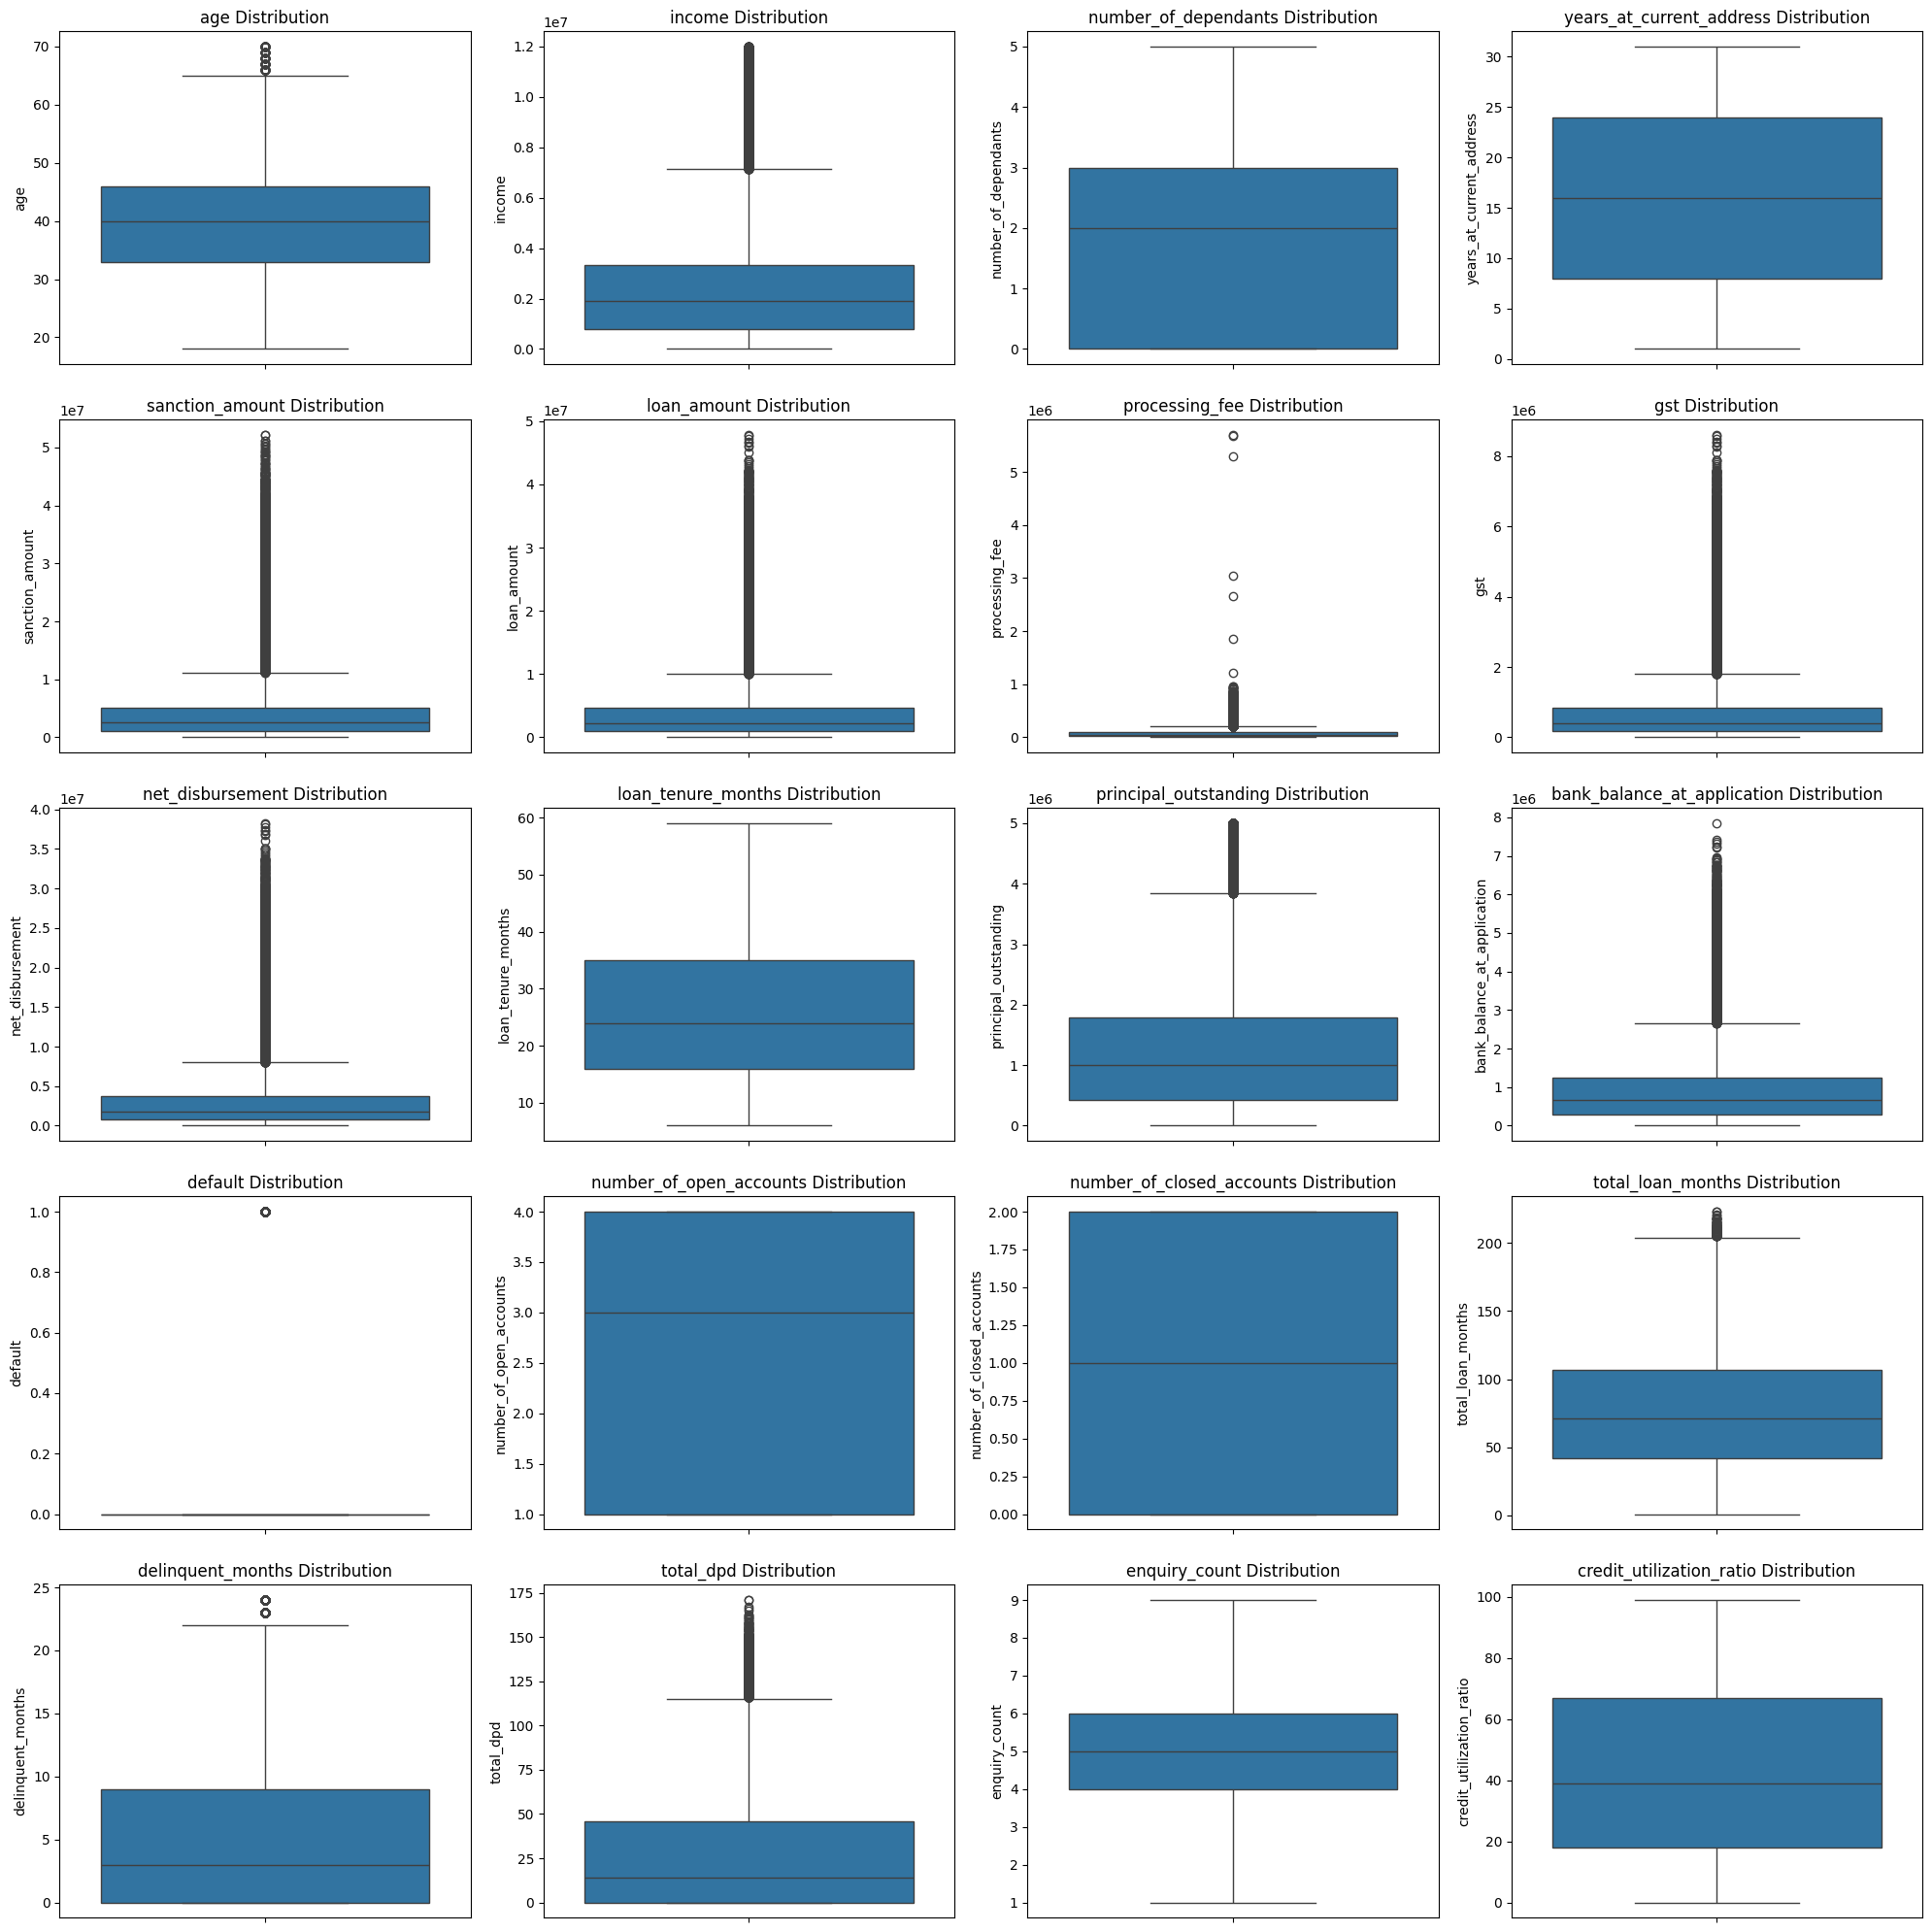

In [ ]:
# Plotting Feature variables vs Target

n_cols = 4
n_rows = int(np.ceil(len(cols_to_plot) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')

# Turn off unused subplots
for j in range(len(cols_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Investigate `processing_fee`

In [ ]:
train_df['processing_fee'].describe()

,processing_fee
count,4.000000e+04
mean,8.082281e+04
std,1.203019e+05
min,0.000000e+00
25%,1.922000e+04
50%,4.472000e+04
75%,9.206500e+04
max,5.698030e+06


In [ ]:
# Inspect row with max processing fee
train_df.loc[train_df['processing_fee'].idxmax()][['processing_fee', 'loan_amount']]

,12294
processing_fee,5698029.900775
loan_amount,4639000


> Processing fee is greater than loan amount here, which shouldn't be the case.

In [ ]:
# Isolate records where processing fee is greater than loan amount
train_df[train_df['processing_fee'] > train_df['loan_amount']][['processing_fee', 'loan_amount']]

,processing_fee,loan_amount
23981,2.669791e+06,2234000
9898,5.293544e+06,3626000
47089,1.858965e+06,1738000
33705,5.678021e+06,3812000
12294,5.698030e+06,4639000
28174,1.214493e+06,966000
29305,3.036378e+06,2616000


> Processing fee is generaly about 3% of the loan amount, so I'll check for records where processing fee is greater than that threshold.

In [ ]:
train_df[(train_df['processing_fee']/train_df['loan_amount']) > 0.03][['processing_fee', 'loan_amount']]

,processing_fee,loan_amount
23981,2.669791e+06,2234000
9898,5.293544e+06,3626000
47089,1.858965e+06,1738000
33705,5.678021e+06,3812000
12294,5.698030e+06,4639000
28174,1.214493e+06,966000
29305,3.036378e+06,2616000


In [ ]:
# Filter off the above columns
train_df1 = train_df[train_df['processing_fee'] / train_df['loan_amount'] < 0.03].copy()

train_df1[(train_df1['processing_fee']/train_df1['loan_amount']) > 0.03][['processing_fee', 'loan_amount']]

,processing_fee,loan_amount


In [ ]:
# Cleanup `processing fee` in test_df
test_df1 = test_df[test_df['processing_fee'] / test_df['loan_amount'] < 0.03].copy()

test_df1[(test_df1['processing_fee']/test_df1['loan_amount']) > 0.03][['processing_fee', 'loan_amount']]

,processing_fee,loan_amount


### Cleanup `loan_purpose` column

In [ ]:
train_df1['loan_purpose'].value_counts()

,count
loan_purpose,
Personal,14013
Home,12003
Auto,7947
Education,6006
Personaal,18


In [ ]:
train_df1['loan_purpose'].replace('Personaal', 'Personal', inplace=True)

# Do the same for the test set
test_df1['loan_purpose'].replace('Personaal', 'Personal', inplace=True)

## Exploratory Data Analysis

In [ ]:
# Group by loan status, and check mean, median of differnt columns like age, income level, etc.

In [ ]:
# Group by age or income level, and check for mean and median for different numerical columns

# Compare age groups vs numeric features
# avg_by_age_group = merged_df.groupby('Age_Group')[numeric_cols].mean().round(2)

# plt.figure(figsize=(12, 5))
# sns.heatmap(avg_by_age_group, annot=True, cmap='Blues', fmt='.2f', cbar_kws={'label': 'Average Value'})
# plt.title('Average Numeric Feature Values by Age Group')
# plt.ylabel('Age Groups')
# plt.xlabel('Numeric Features')
# plt.tight_layout()
# plt.show()

In [ ]:
# Group by cat columns, and check mean and median for different numerical columns

In [ ]:
# You can use crosstabs and plot heatmaps

In [ ]:
# # Plot a barh of age-group ve calories
# age_vs_calories = df.groupby('Age_Group')['Calories'].mean()

# plt.figure(figsize=(8, 4))
# plt.barh(age_vs_calories.index, age_vs_calories.values)
# plt.xlabel('Average Calories')
# plt.ylabel('Age Group')
# plt.title('Average Calories by Age Group')
# plt.show()

## Feature Engineering 1

In [ ]:
# Calculate loan to income ratio
# loan amount / income
train_df1['loan_to_income'] = train_df1['loan_amount']/train_df1['income']

# Do the same for the test set
test_df1['loan_to_income'] = test_df1['loan_amount']/test_df1['income']

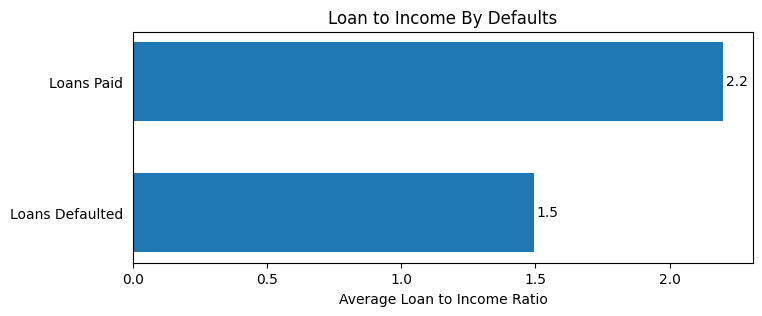

In [ ]:
# Visualize loan to income ratio vs default (loan_status)
loan_to_income_vs_default = train_df1.groupby('default')['loan_to_income'].mean()

plt.figure(figsize=(8, 3))
bars = plt.barh(loan_to_income_vs_default.index, loan_to_income_vs_default.values, height=0.6)

# Custom y-axis labels: 1 = Loans Paid, 0 = Loans Defaulted
plt.yticks([0, 1], ['Loans Defaulted', 'Loans Paid'])

# Remove y-axis tick marks
plt.tick_params(axis='y', left=False)

# Optional: add labels to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.1f}', va='center')

plt.title('Loan to Income By Defaults')
plt.xlabel('Average Loan to Income Ratio')
plt.show()


In [ ]:
# Calculate delinquent months to loan months ratio
train_df1['delinquency_ratio'] = (train_df1['delinquent_months'] * 100 /train_df1['total_loan_months']).round(1)

# Do the same for the test set
test_df1['delinquency_ratio'] = (test_df1['delinquent_months'] * 100 /test_df1['total_loan_months']).round(1)

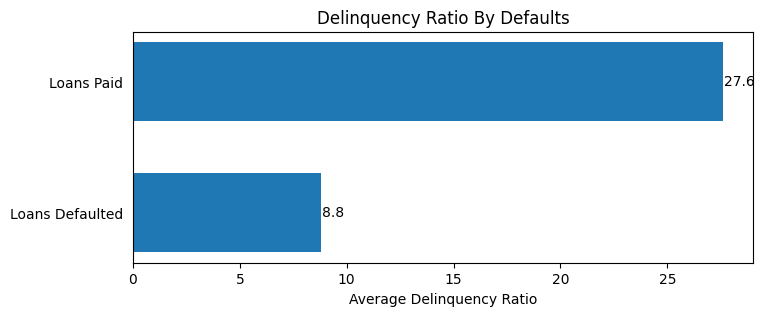

In [ ]:
# Visualize delinquent months to loan months ratio vs default (loan_status)
delinquency_ratio_vs_default = train_df1.groupby('default')['delinquency_ratio'].mean()

plt.figure(figsize=(8, 3))
bars = plt.barh(delinquency_ratio_vs_default.index, delinquency_ratio_vs_default.values, height=0.6)

# Custom y-axis labels: 1 = Loans Paid, 0 = Loans Defaulted
plt.yticks([0, 1], ['Loans Defaulted', 'Loans Paid'])

# Remove y-axis tick marks
plt.tick_params(axis='y', left=False)

# Optional: add labels to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.1f}', va='center')

plt.title('Delinquency Ratio By Defaults')
plt.xlabel('Average Delinquency Ratio')
plt.show()


In [ ]:
# Calculate avg_dpd_per_delinquency
train_df1['avg_dpd_per_delinquency'] = np.where(
    train_df1['delinquent_months'] == 0,
    0,
    (train_df1['total_dpd'] / train_df1['delinquent_months']).round(1)
)

# Do the same for the test set
test_df1['avg_dpd_per_delinquency'] = np.where(
    test_df1['delinquent_months'] == 0,
    0,
    (test_df1['total_dpd'] / test_df1['delinquent_months']).round(1)
)

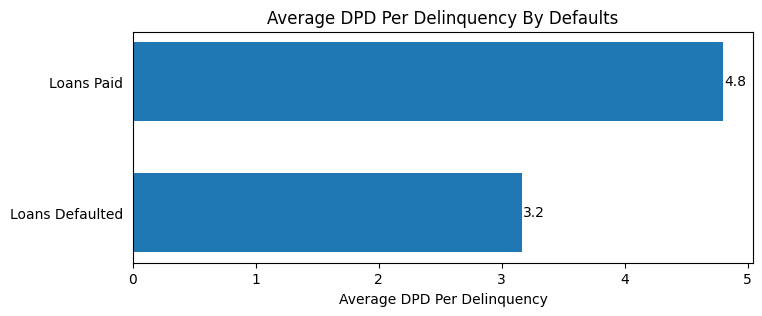

In [ ]:
# Visualize avg_dpd_per_delinquency vs default (loan_status)
avg_dpd_per_delinquency_vs_default = train_df1.groupby('default')['avg_dpd_per_delinquency'].mean()

plt.figure(figsize=(8, 3))
bars = plt.barh(avg_dpd_per_delinquency_vs_default.index, avg_dpd_per_delinquency_vs_default.values, height=0.6)

# Custom y-axis labels: 1 = Loans Paid, 0 = Loans Defaulted
plt.yticks([0, 1], ['Loans Defaulted', 'Loans Paid'])

# Remove y-axis tick marks
plt.tick_params(axis='y', left=False)

# Optional: add labels to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.1f}', va='center')

plt.title('Average DPD Per Delinquency By Defaults')
plt.xlabel('Average DPD Per Delinquency')
plt.show()

## Feature Selection: Numeric Columns

> Using Variance Inflation Factor (VIF)

In [ ]:
# Drop cust_id and loan_id
train_df1.drop(['cust_id', 'loan_id'], axis=1, inplace=True)
test_df1.drop(['cust_id', 'loan_id'], axis=1, inplace=True)

In [ ]:
# Drop disbursal_date, installment_start_dt, loan_amount, income, total_loan_months, delinquent_months, total_dpd
cols_to_drop = ['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 'total_loan_months', 'delinquent_months', 'total_dpd']

train_df1.drop(cols_to_drop, axis=1, inplace=True)
test_df1.drop(cols_to_drop, axis=1, inplace=True)

### Calculate VIF

In [ ]:
# Calculate VIF

def calculate_vif(data):
    # Drop any non-numeric columns
    data = data.select_dtypes(include=[np.number])

    # Drop rows with NaNs (or fill them if appropriate)
    data = data.dropna()

    vif_df = pd.DataFrame()
    vif_df['features'] = data.columns
    vif_df['vif_values'] = [vif(data.values, i) for i in range(data.shape[1])]

    return vif_df


In [ ]:
# Select numerical cols to scale, exclude the target and zipcode
cols_to_scale = ['age', 'number_of_dependants', 'years_at_current_address',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency']

In [ ]:
# Creat x and y data from train_df1, and scale your data
X_train = train_df1.drop('default', axis='columns')
y_train = train_df1['default']

# Creat x and y data from test_df1, and scale your data
X_test = test_df1.drop('default', axis='columns')
y_test = test_df1['default']

# Scale the data
scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [ ]:
calculate_vif(X_train)

,features,vif_values
0,age,5.811163
1,number_of_dependants,2.732818
2,years_at_current_address,3.463387
3,zipcode,5.657195
4,sanction_amount,101.376640
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.139079
9,principal_outstanding,16.291012


In [ ]:
features_to_drop = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement', 'principal_outstanding']

X_train_updated = X_train.drop(features_to_drop, axis=1)
X_test_updated = X_test.drop(features_to_drop, axis=1)

In [ ]:
calculate_vif(X_train_updated)

,features,vif_values
0,age,5.544632
1,number_of_dependants,2.729783
2,years_at_current_address,3.449908
3,zipcode,5.602574
4,loan_tenure_months,5.983222
5,bank_balance_at_application,1.808331
6,number_of_open_accounts,4.329139
7,number_of_closed_accounts,2.376207
8,enquiry_count,6.413941
9,credit_utilization_ratio,2.940479


In [ ]:
selected_numeric_feature_by_vif = calculate_vif(X_train_updated).features.to_list()
selected_numeric_feature_by_vif

['age',
 'number_of_dependants',
 'years_at_current_address',
 'zipcode',
 'loan_tenure_months',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'enquiry_count',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

### Correlation Heatmap

In [ ]:
selected_numeric_features_and_dafaults = ['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'default']

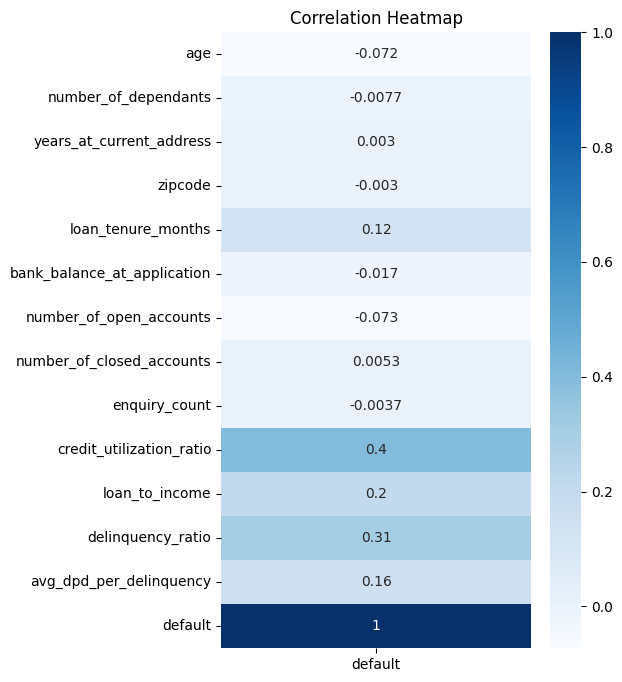

In [ ]:
# Calculate correlation
cm = train_df1[selected_numeric_features_and_dafaults].corr()['default'].to_frame()

# Plot Corr heatmap
plt.figure(figsize=(5, 8))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

## Feature Selection: Categorical Columns

> Using Weight of Evidence (WOE) and Information Value (IV)

In [ ]:
# Function to claculate weight of evidence and information value
def calculate_woe_iv(df, feature_col, target_col):
    # Create a temp DataFrame for grouped values
    temp = df[[feature_col, target_col]].copy()

    # Get counts for each category
    grouped = temp.groupby(feature_col).agg(
        total=('default', 'count'),
        bads=('default', 'sum')
    )
    grouped['goods'] = grouped['total'] - grouped['bads']

    # Overall totals
    total_goods = grouped['goods'].sum()
    total_bads = grouped['bads'].sum()

    # Avoid divide-by-zero errors
    grouped['dist_goods'] = grouped['goods'] / (total_goods + 1e-6)
    grouped['dist_bads'] = grouped['bads'] / (total_bads + 1e-6)

    # Calculate WoE
    grouped['woe'] = np.log((grouped['dist_goods'] + 1e-6) / (grouped['dist_bads'] + 1e-6))

    # Calculate IV
    grouped['iv'] = (grouped['dist_goods'] - grouped['dist_bads']) * grouped['woe']

    # Reset index for display
    woe_iv_df = grouped.reset_index()

    # Total IV
    total_iv = round(woe_iv_df['iv'].sum(), 4)

    return woe_iv_df, total_iv


In [ ]:
woe_table, iv = calculate_woe_iv(df=train_df1, feature_col='loan_purpose', target_col='default')

print("Information Value:", iv)

woe_table


Information Value: 0.3872


,loan_purpose,total,bads,goods,dist_goods,dist_bads,woe,iv
0,Auto,7947,339,7608,0.208148,0.098661,0.746550,0.081737
1,Education,6006,595,5411,0.148040,0.173166,-0.156772,0.003939
2,Home,12003,1865,10138,0.277366,0.542782,-0.671369,0.178192
3,Personal,14031,637,13394,0.366447,0.185390,0.681389,0.123370


In [ ]:
iv_values = {}

for col in train_df1.columns:
    if col == 'default':
        continue

    if train_df1[col].dtype == 'object':
        # For categorical columns
        _, iv = calculate_woe_iv(train_df1, feature_col=col, target_col='default')
    else:
        # For numeric columns: bin the values
        binned_col = pd.cut(train_df1[col], bins=10, labels=False)

        # Create a temp dataframe with the same column name as original
        temp_df = pd.DataFrame({
            col: binned_col,
            'default': train_df1['default']
        })

        # Drop rows where binning resulted in NaNs (e.g. for missing data)
        temp_df = temp_df.dropna()

        # Check that there are at least 2 bins
        if temp_df[col].nunique() > 1:
            _, iv = calculate_woe_iv(temp_df, feature_col=col, target_col='default')
        else:
            iv = 0  # not enough variation

    iv_values[col] = float(iv)

iv_values


{'age': 0.0764,
 'gender': 0.0005,
 'marital_status': 0.0018,
 'employment_status': 0.0025,
 'number_of_dependants': 0.003,
 'residence_type': 0.2545,
 'years_at_current_address': 0.0015,
 'city': 0.0006,
 'state': 0.0006,
 'zipcode': 0.0006,
 'loan_purpose': 0.3872,
 'loan_type': 0.1689,
 'sanction_amount': 0.1025,
 'processing_fee': 0.1065,
 'gst': 0.1065,
 'net_disbursement': 0.1065,
 'loan_tenure_months': 0.2302,
 'principal_outstanding': 0.0183,
 'bank_balance_at_application': 0.0053,
 'number_of_open_accounts': 0.0781,
 'number_of_closed_accounts': 0.0004,
 'enquiry_count': 0.0056,
 'credit_utilization_ratio': 2.4265,
 'loan_to_income': 0.4879,
 'delinquency_ratio': 0.678,
 'avg_dpd_per_delinquency': 0.4074}

In [ ]:
# Convert iv_values to a dataframe
iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])

# Sort the DataFrame by IV in descending order
iv_df = iv_df.sort_values(by='IV', ascending=False)

iv_df

,Feature,IV
22,credit_utilization_ratio,2.4265
24,delinquency_ratio,0.6780
23,loan_to_income,0.4879
25,avg_dpd_per_delinquency,0.4074
10,loan_purpose,0.3872
5,residence_type,0.2545
16,loan_tenure_months,0.2302
11,loan_type,0.1689
13,processing_fee,0.1065
14,gst,0.1065


In [ ]:
# Select features with IV > 0.02
selected_features_by_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_by_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'sanction_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

In [ ]:
selected_numeric_feature_by_vif

['age',
 'number_of_dependants',
 'years_at_current_address',
 'zipcode',
 'loan_tenure_months',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'enquiry_count',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

### Feature Encoding

In [ ]:
# Select IV features
X_train_reduced = X_train[selected_features_by_iv]
X_test_reduced = X_test[selected_features_by_iv]

In [ ]:
X_train_reduced.head(3)

,age,residence_type,loan_purpose,loan_type,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
39087,0.211538,Owned,Personal,Unsecured,0.012110,0.013335,0.013335,0.013335,0.283019,0.666667,0.929293,0.137204,0.000,0.0
30893,0.346154,Mortgage,Home,Secured,0.202096,0.214030,0.214030,0.214030,0.452830,0.666667,0.535354,0.742850,0.128,0.7
45278,0.326923,Owned,Home,Secured,0.350242,0.336934,0.336934,0.336934,0.433962,0.666667,0.050505,0.602479,0.015,0.5


In [ ]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)

X_train_encoded.head(3)

,age,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
39087,0.211538,0.012110,0.013335,0.013335,0.013335,0.283019,0.666667,0.929293,0.137204,0.000,0.0,True,False,False,False,True,True
30893,0.346154,0.202096,0.214030,0.214030,0.214030,0.452830,0.666667,0.535354,0.742850,0.128,0.7,False,False,False,True,False,False
45278,0.326923,0.350242,0.336934,0.336934,0.336934,0.433962,0.666667,0.050505,0.602479,0.015,0.5,True,False,False,True,False,False


## Model Training & Evaluation

In [ ]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_encoded, y_train)

# Make predictions
y_pred = model.predict(X_test_encoded)

# Evaluate model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9137
           1       0.82      0.72      0.77       861

    accuracy                           0.96      9998
   macro avg       0.90      0.85      0.87      9998
weighted avg       0.96      0.96      0.96      9998



> One of the objectives of this project is that recall should be higher than 90%, so that the model is more likely to catch a potential loan defaulter. A Precision of 50% is okay, because Recall is more important in this case.

In [ ]:
# Train with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_encoded, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test_encoded)

# Evaluate model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9137
           1       0.85      0.71      0.77       861

    accuracy                           0.96      9998
   macro avg       0.91      0.85      0.88      9998
weighted avg       0.96      0.96      0.96      9998



In [ ]:
# Train an XGBoost Classifier
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train_encoded, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test_encoded)

# Evaluate model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9137
           1       0.81      0.75      0.78       861

    accuracy                           0.96      9998
   macro avg       0.89      0.87      0.88      9998
weighted avg       0.96      0.96      0.96      9998



### Handle Class Imbalance with Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train_encoded, y_train)

y_resampled.value_counts()

,count
default,
0,3436
1,3436


In [ ]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = model.predict(X_test_encoded)

# Evaluate model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      9137
           1       0.50      0.95      0.66       861

    accuracy                           0.91      9998
   macro avg       0.75      0.93      0.80      9998
weighted avg       0.95      0.91      0.93      9998



In [ ]:
# Train an XGBoost Classifier

xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_resampled, y_resampled)

# Make predictions
y_pred = xgb_clf.predict(X_test_encoded)

# Evaluate model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      9137
           1       0.55      0.95      0.70       861

    accuracy                           0.93      9998
   macro avg       0.77      0.94      0.83      9998
weighted avg       0.96      0.93      0.94      9998



### Handle Class Imbalance with Oversampling

In [ ]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_smt_resampled, y_smt_resampled = smote_tomek.fit_resample(X_train_encoded, y_train)

y_smt_resampled.value_counts()

,count
default,
0,36502
1,36502


In [ ]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_smt_resampled, y_smt_resampled)

# Make predictions
y_pred = model.predict(X_test_encoded)

# Evaluate model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      9137
           1       0.55      0.94      0.70       861

    accuracy                           0.93      9998
   macro avg       0.77      0.93      0.83      9998
weighted avg       0.96      0.93      0.94      9998



### Model Fine-tuning with Optuna

In [ ]:
#install optuna
!pip install optuna

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

In [ ]:
def objective(trail):

  params = {
  "C" : trail.suggest_float("C", 1e-4, 1e4, log=True),
  "solver" : trail.suggest_categorical("solver", ['newton-cg', 'sag', 'saga', 'liblinear', 'lbfgs']),
  "tol" : trail.suggest_float("tol", 1e-4, 1e-2, log=True),
  "class_weight" : trail.suggest_categorical("class_weight", [None, 'balanced'])
  }

  model = LogisticRegression(**params, max_iter=10000, random_state=42)
  f1_scorer = make_scorer(f1_score, average="macro")
  scores = cross_val_score(model, X_smt_resampled, y_smt_resampled, cv=5, scoring=f1_scorer, n_jobs=-1)


  return np.mean(scores)

study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(objective, n_trials=50)


In [ ]:
trial = study_lr.best_trial
print('Best trial: score {}, params {}'.format(trial.value, trial.params))

for key, value in trial.params.items():
    print('{}: {}'.format(key, value))

Best trial: score 0.9452898032214956, params {'C': 42.57549333372046, 'solver': 'saga', 'tol': 0.00043305705113037775, 'class_weight': 'balanced'}
C: 42.57549333372046
solver: saga
tol: 0.00043305705113037775
class_weight: balanced


In [ ]:
best_lr_model = LogisticRegression(**study_lr.best_params)
best_lr_model.fit(X_smt_resampled, y_smt_resampled)

# Make predictions
y_pred = best_lr_model.predict(X_test_encoded)

# Evaluate model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      9137
           1       0.55      0.94      0.70       861

    accuracy                           0.93      9998
   macro avg       0.77      0.93      0.83      9998
weighted avg       0.96      0.93      0.94      9998



In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate probablities
probabilities = best_lr_model.predict_proba(X_test_encoded)[:, 1]


In [ ]:
probabilities

array([4.43512806e-06, 7.59321231e-01, 1.48690472e-01, ...,
       2.73858381e-05, 7.30061498e-07, 2.40814578e-01])

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

fpr[:10], tpr[:10], thresholds[:10]

(array([0.        , 0.        , 0.        , 0.00010945, 0.00010945,
        0.00021889, 0.00021889, 0.00032834, 0.00032834, 0.00043778]),
 array([0.        , 0.00116144, 0.19163763, 0.19163763, 0.2775842 ,
        0.2775842 , 0.31242741, 0.31242741, 0.34146341, 0.34146341]),
 array([       inf, 0.99999997, 0.99919956, 0.99918747, 0.99776528,
        0.9977592 , 0.99677967, 0.99675722, 0.9958893 , 0.99582271]))

In [ ]:
# Calculate AUC
auc_score = auc(fpr, tpr)

auc_score

np.float64(0.9829560527660186)

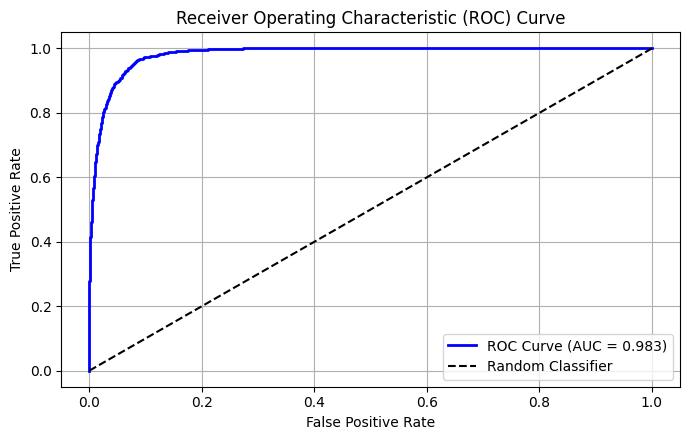

In [ ]:
# Calculate AUC
#auc_score = roc_auc_score(y_test, probabilities)

# Plot the ROC Curve
plt.figure(figsize=(7, 4.5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.3f})", color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

## Model Evaluation: Rank Order & KS Statistic

In [ ]:
probabilities = best_lr_model.predict_proba(X_test_encoded)[:, 1]

df_eval = pd.DataFrame({
    'default_truth': y_test,
    'default_proba': probabilities
})

df_eval.head()

,default_truth,default_proba
33553,0,0.000004
9427,0,0.759321
199,0,0.148690
12447,0,0.425256
39489,0,0.000795


In [ ]:
df_eval['decile'] = pd.qcut(df_eval['default_proba'], 10, labels=False, duplicates='drop')

df_eval.head(3)

,default_truth,default_proba,decile
33553,0,0.000004,1
9427,0,0.759321,8
199,0,0.148690,7


In [ ]:
df_grouped = df_eval.groupby('decile').apply(lambda x: pd.Series({
    'min_proba': round(x['default_proba'].min(), 2),
    'max_proba': round(x['default_proba'].max(), 2),
    'bad_count': x['default_truth'].sum(),
    'good_count': x['default_truth'].count() - x['default_truth'].sum()
}))

df_grouped.reset_index(inplace=True)
df_grouped

,decile,min_proba,max_proba,bad_count,good_count
0,0,0.00,0.00,0.0,1000.0
1,1,0.00,0.00,0.0,1000.0
2,2,0.00,0.00,0.0,1000.0
3,3,0.00,0.00,0.0,999.0
4,4,0.00,0.00,0.0,1000.0
5,5,0.00,0.00,0.0,1000.0
6,6,0.00,0.03,2.0,997.0
7,7,0.03,0.20,13.0,987.0
8,8,0.20,0.83,128.0,872.0
9,9,0.83,1.00,718.0,282.0


In [ ]:
df_grouped['good_count'].sum()

np.float64(9137.0)

In [ ]:
(df_grouped['good_count'] + df_grouped['bad_count']).sum()

np.float64(9998.0)

In [ ]:
# Calculate good rate and bad rate
df_grouped['bad_rate'] = df_grouped['bad_count']*100 / (df_grouped['good_count'] + df_grouped['bad_count'])
df_grouped['good_rate'] = df_grouped['good_count']*100 / (df_grouped['good_count'] + df_grouped['bad_count'])

df_grouped.sort_values(by='decile', ascending=False, inplace=True)
df_grouped

,decile,min_proba,max_proba,bad_count,good_count,bad_rate,good_rate
9,9,0.83,1.00,718.0,282.0,71.8000,28.2000
8,8,0.20,0.83,128.0,872.0,12.8000,87.2000
7,7,0.03,0.20,13.0,987.0,1.3000,98.7000
6,6,0.00,0.03,2.0,997.0,0.2002,99.7998
5,5,0.00,0.00,0.0,1000.0,0.0000,100.0000
4,4,0.00,0.00,0.0,1000.0,0.0000,100.0000
3,3,0.00,0.00,0.0,999.0,0.0000,100.0000
2,2,0.00,0.00,0.0,1000.0,0.0000,100.0000
1,1,0.00,0.00,0.0,1000.0,0.0000,100.0000
0,0,0.00,0.00,0.0,1000.0,0.0000,100.0000


In [ ]:
# Calculate cumulative % of bad and good
df_grouped['cum_bad'] = df_grouped['bad_count'].cumsum()
df_grouped['cum_good'] = df_grouped['good_count'].cumsum()

df_grouped['cum_bad_rate'] = df_grouped['cum_bad']*100 / df_grouped['bad_count'].sum()
df_grouped['cum_good_rate'] = df_grouped['cum_good']*100/ df_grouped['good_count'].sum()

df_grouped

,decile,min_proba,max_proba,bad_count,good_count,bad_rate,good_rate,cum_bad,cum_good,cum_bad_rate,cum_good_rate
9,9,0.83,1.00,718.0,282.0,71.8000,28.2000,718.0,282.0,83.391405,3.086352
8,8,0.20,0.83,128.0,872.0,12.8000,87.2000,846.0,1154.0,98.257840,12.629966
7,7,0.03,0.20,13.0,987.0,1.3000,98.7000,859.0,2141.0,99.767712,23.432199
6,6,0.00,0.03,2.0,997.0,0.2002,99.7998,861.0,3138.0,100.000000,34.343877
5,5,0.00,0.00,0.0,1000.0,0.0000,100.0000,861.0,4138.0,100.000000,45.288388
4,4,0.00,0.00,0.0,1000.0,0.0000,100.0000,861.0,5138.0,100.000000,56.232899
3,3,0.00,0.00,0.0,999.0,0.0000,100.0000,861.0,6137.0,100.000000,67.166466
2,2,0.00,0.00,0.0,1000.0,0.0000,100.0000,861.0,7137.0,100.000000,78.110977
1,1,0.00,0.00,0.0,1000.0,0.0000,100.0000,861.0,8137.0,100.000000,89.055489
0,0,0.00,0.00,0.0,1000.0,0.0000,100.0000,861.0,9137.0,100.000000,100.000000


In [ ]:
# Calculate the KS statistic
df_grouped['ks'] = np.abs(df_grouped['cum_good_rate'] - df_grouped['cum_bad_rate'])
df_grouped

,decile,min_proba,max_proba,bad_count,good_count,bad_rate,good_rate,cum_bad,cum_good,cum_bad_rate,cum_good_rate,ks
9,9,0.83,1.00,718.0,282.0,71.8000,28.2000,718.0,282.0,83.391405,3.086352,80.305053
8,8,0.20,0.83,128.0,872.0,12.8000,87.2000,846.0,1154.0,98.257840,12.629966,85.627874
7,7,0.03,0.20,13.0,987.0,1.3000,98.7000,859.0,2141.0,99.767712,23.432199,76.335513
6,6,0.00,0.03,2.0,997.0,0.2002,99.7998,861.0,3138.0,100.000000,34.343877,65.656123
5,5,0.00,0.00,0.0,1000.0,0.0000,100.0000,861.0,4138.0,100.000000,45.288388,54.711612
4,4,0.00,0.00,0.0,1000.0,0.0000,100.0000,861.0,5138.0,100.000000,56.232899,43.767101
3,3,0.00,0.00,0.0,999.0,0.0000,100.0000,861.0,6137.0,100.000000,67.166466,32.833534
2,2,0.00,0.00,0.0,1000.0,0.0000,100.0000,861.0,7137.0,100.000000,78.110977,21.889023
1,1,0.00,0.00,0.0,1000.0,0.0000,100.0000,861.0,8137.0,100.000000,89.055489,10.944511
0,0,0.00,0.00,0.0,1000.0,0.0000,100.0000,861.0,9137.0,100.000000,100.000000,0.000000


### Calculate Gini Coefficient

In [ ]:
gini_coef = 2 * auc_score - 1

print("AUC:", auc_score)
print("Gini Coefficient:", gini_coef)

AUC: 0.9829560527660186
Gini Coefficient: 0.9659121055320372


## Final Model & Feature Importance

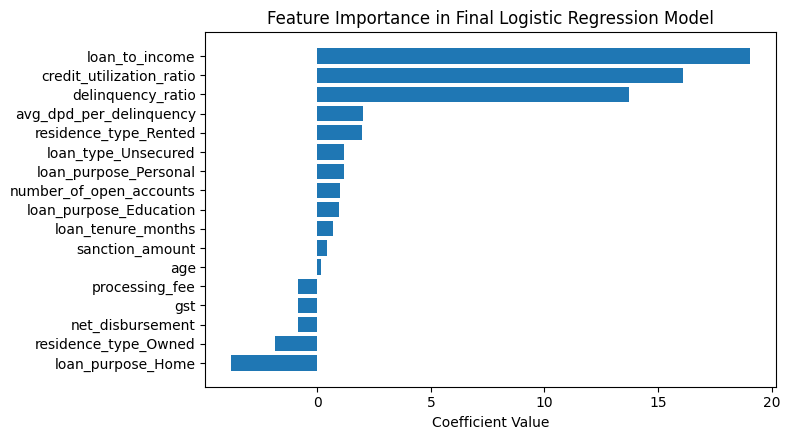

In [ ]:
final_model = best_lr_model

# Create a df for features and coefficients
coef_df = pd.DataFrame({
    'feature': X_train_encoded.columns,
    'coefficient': final_model.coef_[0]
})

# Sort coefficients
coef_df.sort_values(by='coefficient', ascending=True, inplace=True)

# Plot coef_df
plt.figure(figsize=(8,4.5))
plt.barh(coef_df['feature'], coef_df['coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Final Logistic Regression Model')
plt.tight_layout()
plt.show()

## Save Best Logistic Regression Model

In [ ]:
from joblib import dump
model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}

dump(model_data, '/content/drive/MyDrive/Models/final_log_reg_model.joblib')


['/content/drive/MyDrive/Models/final_log_reg_model.joblib']